<a href="https://colab.research.google.com/github/Ajitessh-P-R/Machine-Learning-Assignment/blob/main/bodyweight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns




In [10]:
data = {
    'Weight': [79, 69, 73, 95, 82, 55, 69, 71, 64, 69],
    'Height': [1.80, 1.68, 1.82, 1.70, 1.87, 1.55, 1.50, 1.78, 1.67, 1.64],
    'Age': [35, 39, 25, 60, 27, 18, 89, 42, 16, 52],
    'Gender': ['Male', 'Male', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female']
}
df = pd.DataFrame(data)
display(df.head())

,Weight,Height,Age,Gender
0,79,1.80,35,Male
1,69,1.68,39,Male
2,73,1.82,25,Male
3,95,1.70,60,Male
4,82,1.87,27,Male


In [11]:


encoder = OneHotEncoder(drop='first', sparse_output=False)
gender_encoded = encoder.fit_transform(df[['Gender']])
gender_df = pd.DataFrame(gender_encoded, columns=['Gender_Male'])

X = pd.concat([df[['Height', 'Age']], gender_df], axis=1)
y = df['Weight']



In [12]:

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)


r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))


In [13]:

print("✅ Linear Regression Model Trained")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")



✅ Linear Regression Model Trained
R² Score: 0.7535
RMSE: 5.10


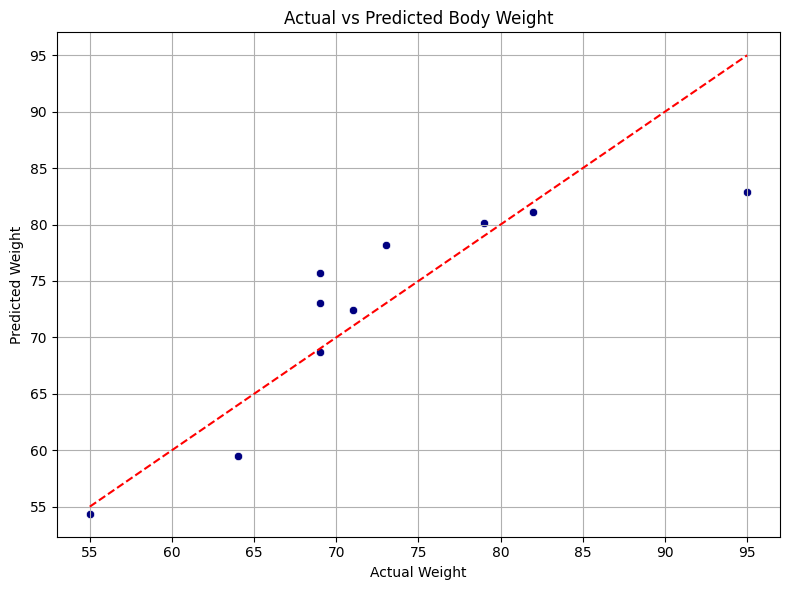

In [14]:

plt.figure(figsize=(8,6))
sns.scatterplot(x=y, y=y_pred, color='navy')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")
plt.title("Actual vs Predicted Body Weight")
plt.grid(True)
plt.tight_layout()
plt.show()